<b>Hola Elias</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.

# Sprint10
# Prueba A/B para tienda en línea 

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

In [1]:
# Importamos las librerias necesarias
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Cargamos los archivos
hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=';')
orders = pd.read_csv("/datasets/orders_us.csv")
visits = pd.read_csv("/datasets/visits_us.csv")

# Priorizar Hipotesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

Tenemos que:
- Aplicar el framework ICE y ordernar en orden descendente de prioridad.
- Aplicar el framework RICE y ordenar en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizamos RICE en lugar de ICE. Y proporcionar una explicación de los cambios.

In [3]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


# ICE

In [6]:

hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence'] 
                    / hypotheses['Effort'])


ICE = hypotheses.sort_values(by='ICE', ascending=False)['ICE']
ICE

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
Name: ICE, dtype: float64

Se observa que las hipotesis mas importantes segun  ICE son 8, la 0 y la 7, con puntajes de 16, 13 y 11. Los puntajes no tienen mucha variacion entre si.

# RICE

In [7]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] 
                    / hypotheses['Effort'])


RICE = hypotheses.sort_values(by='RICE', ascending=False)['RICE']
RICE

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
Name: RICE, dtype: float64

<div class="alert alert-block alert-success">
<b>Celdas [3–7]</b> <a class="tocSkip"></a><br>
Muy bien implementado el análisis de priorización de hipótesis. Has aplicado correctamente los frameworks ICE y RICE, explicando con claridad las diferencias entre ambos. La forma en que contrastas los resultados y justificas las posiciones en cada ranking muestra un entendimiento sólido de su aplicación en decisiones de negocio.
</div>


Se observa que las hipotesis mas importantes segun RICE son la 7, la 2, la 0 y la 6, con puntajes de 112, 56, 40 y 40. Aqui los puntajes si tienen una variacion mas considerable, ya que del primero al segundo es el doble.

# RICE vs ICE

In [8]:
# Tomamos el top 5 de RICE
rice_top5 = hypotheses[hypotheses.index.isin(RICE.index[0:5])]
rice_top5

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [9]:
# Tomamos el top 5 de ICE
ice_top5 = hypotheses[hypotheses.index.isin(ICE.index[0:5])]
ice_top5

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2



Observamos que las cinco mejores hipótesis son las mismas tanto con la métrica ICE como con RICE, aunque no están en el mismo orden. Esto se debe a que RICE es una versión ajustada de ICE que toma en cuenta también el alcance (Reach), lo cual puede cambiar la prioridad de las hipótesis según cuántas personas podrían verse afectadas.

Por ejemplo:

La hipótesis 7 pasa del tercer lugar en ICE al primero en RICE gracias a que tiene el mayor alcance posible (10).

La hipótesis 2 mejora su posición del quinto lugar en ICE al segundo en RICE porque también tiene un alcance alto (8).

La hipótesis 6 sube un lugar (de cuarta a tercera) por tener un alcance intermedio (5).

En cambio, la hipótesis 0 baja del segundo lugar al cuarto en RICE porque su alcance es bajo (3).

Y la hipótesis 8, que era la mejor en ICE, cae hasta el quinto lugar en RICE ya que tiene el menor alcance de todas (1).

# Conclusion

Las cinco mejores hipótesis según el método ICE son las mismas que en RICE, aunque en diferente orden.
El puntaje entre las tres mejores hipótesis en ICE es bastante similar, lo que indica poca diferencia entre ellas.
En cambio, en RICE esas diferencias son más marcadas, porque esta métrica considera el alcance (Reach).

Al analizar el top 5 de ICE, vemos que:

Las hipótesis con un alcance de 5 o más subieron posiciones al aplicar RICE.

Las que tienen un alcance menor a 5 bajaron en la clasificación.

Finalmente, tanto en ICE como en RICE, las hipótesis 7 y 0 se mantienen entre las tres mejores. Sin embargo, se recomienda priorizar la 7 porque impactaría a más usuarios gracias a su mayor alcance.

# Analisis del test A/B
- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [12]:
# Cambiamos la columna date a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


<div class="alert alert-block alert-success">
<b>Celdas [10–12]</b> <a class="tocSkip"></a><br>
Excelente preparación del dataset <code>orders</code>. Convertiste correctamente la columna de fecha y validaste tanto duplicados como usuarios en ambos grupos. Esta limpieza previa es esencial para obtener análisis fiables y la aplicaste con un criterio bien justificado.
</div>


In [13]:
# Verificamos duplicados en transactionId
print('Numero de Ids de ordenes duplicados: ', orders[['transactionId']].duplicated().sum())

Numero de Ids de ordenes duplicados:  0


In [14]:
# Verificamos que no haya interseccion entre los grupos
setA = set(orders[orders['group'] == 'A']['visitorId'])
setB = set(orders[orders['group'] == 'B']['visitorId'])
setAnB = setA.intersection(setB)
print('Numero de usuarios presentes en ambos grupos: ', len(setAnB))

Numero de usuarios presentes en ambos grupos:  58


In [15]:
# Eliminamos a los usuarios presentes en ambos grupos
orders_no_duplicates = orders[~orders['visitorId'].isin(list(setAnB))]
orders_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [50]:
# Mostrar el dataset visits
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
# Mostramos info
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
# Cambiamos la columna date al tipo datetime y la columna group al tipo category
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Se preprocesaron los datos correctamente:

- Se cambiaron las columnas de fecha a tipo datetime
- Se eliminaron a los usuarios que pertenecian a ambos grupos

# Ingresos acumulados por grupo

In [19]:
# Se genera la tabla de pares fecha y grupo
dateGroups = orders_no_duplicates[['date', 'group']].drop_duplicates()
dateGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [20]:
# Se genera la tabla de datos acumulados para orders
ordersAccum = dateGroups.apply(
lambda x: orders_no_duplicates[
    np.logical_and(
    orders_no_duplicates['date'] <= x['date'],
    orders_no_duplicates['group'] == x['group'])
].agg({
    'date': 'max',
    'revenue': 'sum',
    'group': 'max',
    'transactionId': 'nunique',
    'visitorId': 'nunique'
}), axis=1).sort_values(by=['date', 'group'])
ordersAccum.head()

,date,revenue,group,transactionId,visitorId
55,2019-08-01,2266.6,A,23,19
66,2019-08-01,967.2,B,17,17
175,2019-08-02,3734.9,A,42,36
173,2019-08-02,3535.3,B,40,39
291,2019-08-03,5550.1,A,66,60


In [21]:
# Se genera la tabla de datos acumulados para visits
visitsAccum = dateGroups.apply(
lambda x: visits[
    np.logical_and(
    visits['date'] <= x['date'],
    visits['group'] == x['group'])
].agg({
    'date': 'max',
    'group': 'max',
    'visits': 'sum'
}), axis=1).sort_values(by=['date', 'group'])
visitsAccum.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [22]:
# Se genera la tabla de datos acumulados
dataAccum = ordersAccum.merge(visitsAccum, on=['date', 'group'])
dataAccum.columns = ['date', 'revenue', 'group', 'transactions', 'buyers', 'visits']
dataAccum

,date,revenue,group,transactions,buyers,visits
0,2019-08-01,2266.6,A,23,19,719
1,2019-08-01,967.2,B,17,17,713
2,2019-08-02,3734.9,A,42,36,1338
3,2019-08-02,3535.3,B,40,39,1294
4,2019-08-03,5550.1,A,66,60,1845
...,...,...,...,...,...,...
57,2019-08-29,74576.7,B,510,490,17708
58,2019-08-30,52363.7,A,460,437,18037
59,2019-08-30,77863.5,B,531,511,18198
60,2019-08-31,53212.0,A,468,445,18736


In [23]:
# Se divide la tabla en grupos
dataAccumA = dataAccum[dataAccum['group'] == 'A'].copy()
dataAccumB = dataAccum[dataAccum['group'] == 'B'].copy()

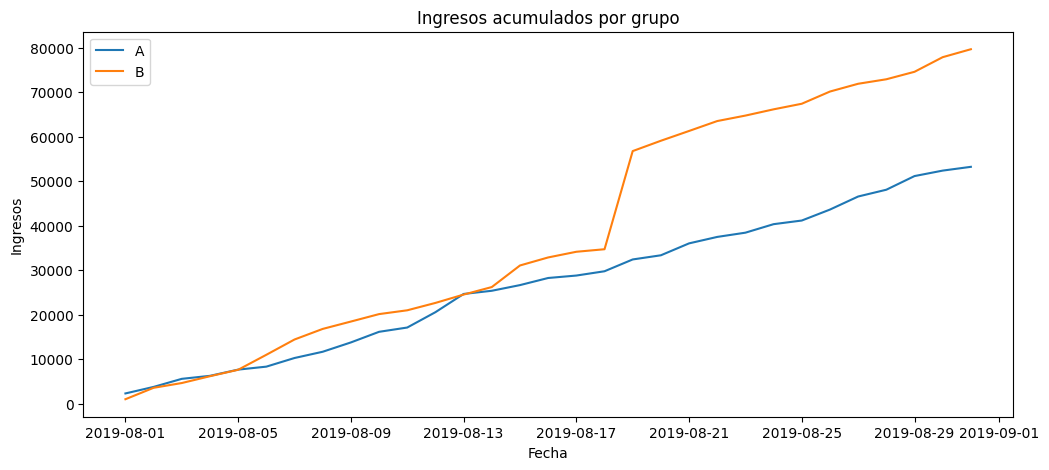

In [24]:
# Se grafica el ingreso acumulado por grupo
plt.figure(figsize=(12,5))
plt.plot(dataAccumA['date'], dataAccumA['revenue'], label='A')
plt.plot(dataAccumB['date'], dataAccumB['revenue'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Ingresos acumulados por grupo')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [24]</b> <a class="tocSkip"></a><br>
La gráfica de ingresos acumulados está bien construida, con una lectura clara y visualmente informativa. La interpretación que haces destaca un análisis crítico, reconociendo eventos anómalos que afectan al grupo B, lo cual demuestra una lectura inteligente de los datos.
</div>


Al principio del experimento, ambos grupos muestran ingresos acumulados similares y con un crecimiento constante.
Después de la primera semana, el grupo B comienza a destacar y alrededor del 18 de agosto sus ingresos aumentan de forma muy abrupta en un solo día, mientras que el grupo A mantiene un crecimiento estable y parejo.
A partir de ahí, ambos grupos siguen creciendo a ritmos similares hasta el final del test.

Este salto repentino en el grupo B debe analizarse más a fondo, ya que podría deberse a factores externos como promociones especiales. Sin embargo, es llamativo que este cambio ocurra únicamente en uno de los grupos y no en ambos.

# Tamaño de pedido promedio acumulado por grupo

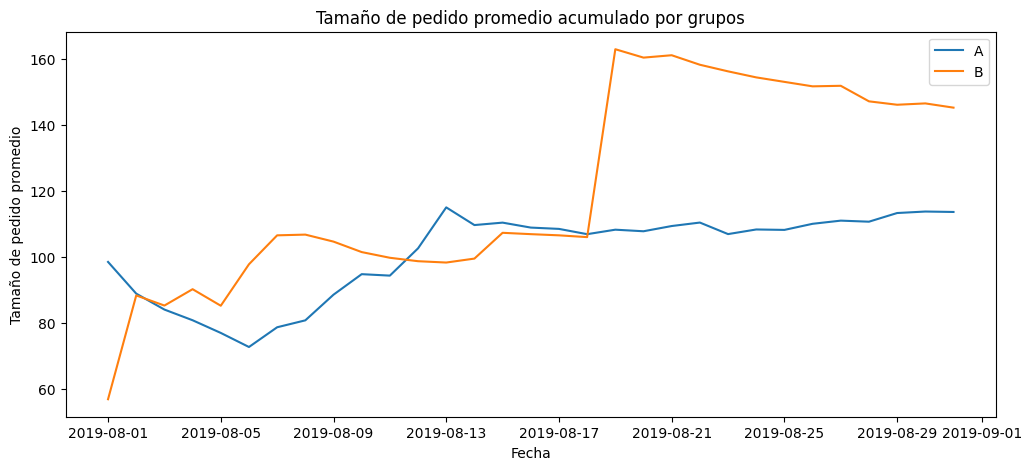

In [25]:
# Se grafica el tamaño de pedido promedio por grupo
plt.figure(figsize=(12,5))
plt.plot(dataAccumA['date'], dataAccumA['revenue'] / dataAccumA['transactions'], label='A')
plt.plot(dataAccumB['date'], dataAccumB['revenue'] / dataAccumB['transactions'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio')
plt.title('Tamaño de pedido promedio acumulado por grupos')
plt.legend()
plt.show()

En el grupo A se nota un aumento inusual en la cantidad de pedidos al inicio del test, lo que provoca que el tamaño promedio de los pedidos disminuya. A partir del 6 de agosto, este indicador comienza a recuperarse y se estabiliza cerca del valor de 110 una semana después.

En cambio, el grupo B muestra un patrón más irregular. Entre el 7 y el 17 de agosto parece buscar estabilidad, pero el 18 de agosto ocurre un salto repentino en el tamaño promedio de pedido, como se vio también en los ingresos acumulados. Esto sugiere que ese aumento no fue por tener más pedidos, sino por pedidos mucho más grandes. Luego, el tamaño promedio vuelve a bajar conforme los ingresos se normalizan.

Este comportamiento atípico —y exclusivo del grupo B— debe investigarse, ya que puede deberse a pedidos excepcionalmente altos o situaciones no previstas que influyen en los resultados del test.

# Diferencia relativa en tamaño de pedido promedio acumulado

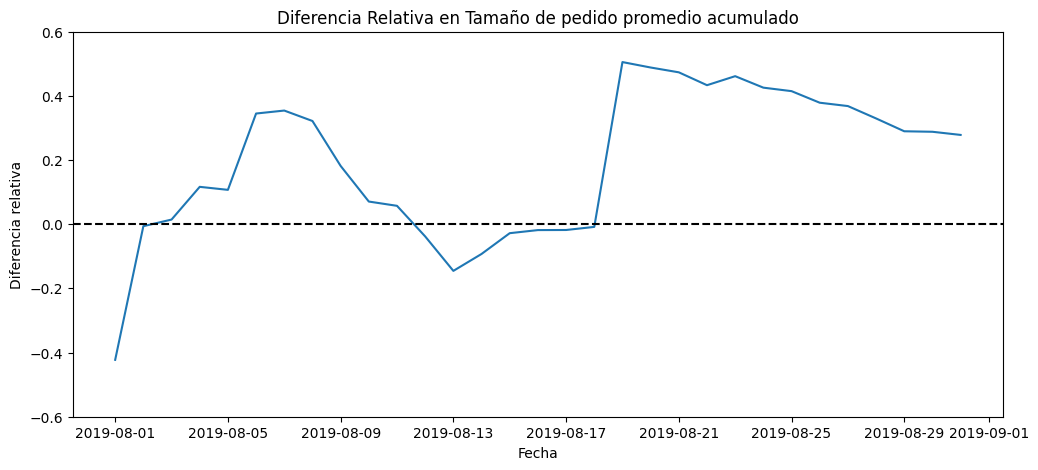

In [26]:
# Se grafica el tamaño de pedido promedio por grupo
plt.figure(figsize=(12,5))
plt.plot(dataAccumA['date'], ((dataAccumB['revenue']/dataAccumB['transactions']).reset_index(drop=True) /
                              (dataAccumA['revenue']/dataAccumA['transactions']).reset_index(drop=True) - 1))

plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.ylim([-0.6, 0.6])
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencia Relativa en Tamaño de pedido promedio acumulado')
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [26]</b> <a class="tocSkip"></a><br>
La lógica y el objetivo del gráfico de diferencia relativa están correctos. 
</div>


Al inicio del experimento, el grupo B tiene un tamaño promedio de pedido menor que el grupo A, pero rápidamente se recupera y lo supera, llegando a estar casi un 40% por encima. Este comportamiento coincide con el aumento observado en los ingresos acumulados.

El 13 de agosto se presenta una caída del 20% en comparación con el grupo A, provocada por un aumento en el tamaño de los pedidos del grupo A. Es importante señalar que en esa fecha ambos grupos tenían ingresos acumulados similares, lo cual sugiere que el grupo A hizo menos pedidos, pero de mayor valor.

Posteriormente, el impacto de los pedidos anómalos del día 18 vuelve a impulsar al grupo B, alcanzando una ventaja de más del 50% frente al grupo A. Sin embargo, esta ventaja se reduce gradualmente hasta estabilizarse en un 30% por encima al final del experimento. Como se mencionó antes, este pico está asociado a pedidos inusualmente costosos que deben analizarse con más detalle.

# Tasas de conversion diarias

In [27]:
# Se genera tabla de datos diarios
dataDaily = (
    orders_no_duplicates.merge(visits, on=['date', 'group'])
    .groupby(by=['date', 'group'], as_index=False)
    .agg({
        'transactionId': 'nunique',
        'visitorId': 'nunique',
        'revenue': 'sum',
        'visits': 'max'
    })
)
dataDaily.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visits']
dataDaily.head()

,date,group,transactions,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,19,18,1468.3,619
3,2019-08-02,B,23,22,2568.1,581
4,2019-08-03,A,24,24,1815.2,507


In [28]:
# Se calcula la conversion
dataDaily['conversion'] = (dataDaily['transactions'] / 
                          dataDaily['visits']) * 100
dataDaily.head()

,date,group,transactions,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,3.198887
1,2019-08-01,B,17,17,967.2,713,2.384292
2,2019-08-02,A,19,18,1468.3,619,3.069467
3,2019-08-02,B,23,22,2568.1,581,3.958692
4,2019-08-03,A,24,24,1815.2,507,4.733728


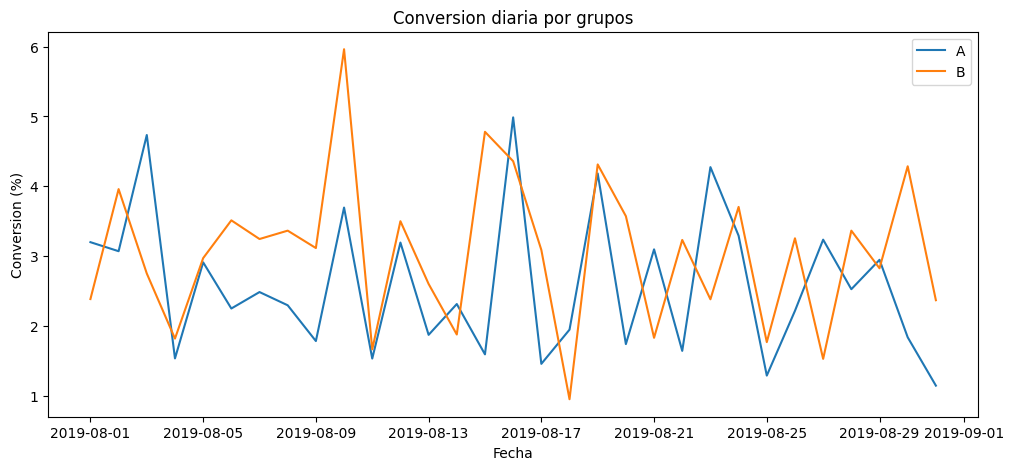

In [29]:
# Se grafica la conversion diaria por grupos
dataDailyA = dataDaily[dataDaily['group'] == 'A']
dataDailyB = dataDaily[dataDaily['group'] == 'B']

plt.figure(figsize=(12, 5))
plt.plot(dataDailyA['date'], dataDailyA['conversion'], label='A')
plt.plot(dataDailyB['date'], dataDailyB['conversion'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Conversion (%)')
plt.legend()
plt.title('Conversion diaria por grupos')
plt.show()

Podemos observar que la conviersion diaria oscila bastante para ambos grupos. Es preferible observar la conversion acumulada y sacar conclusiones de esa grafica.

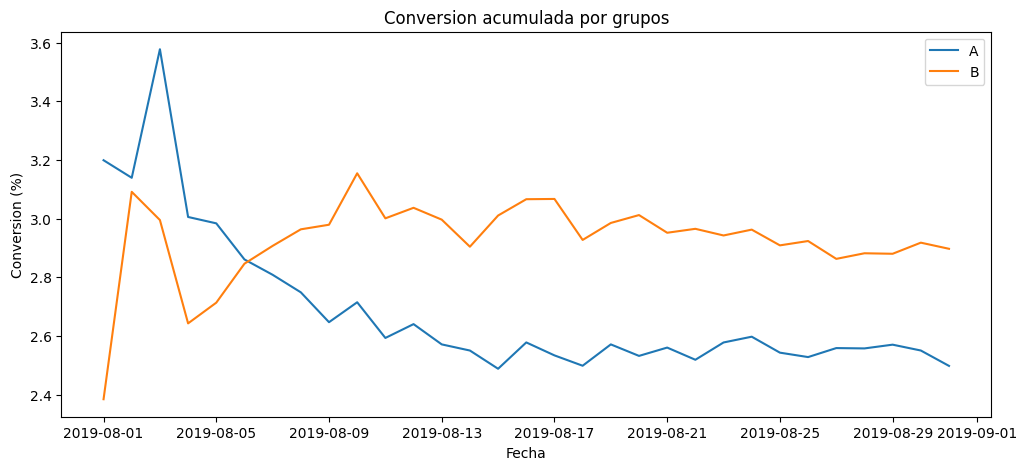

In [30]:
# Se grafica la conversion acumulada para ambos grupos
dataAccumA.loc[:, 'conversion'] = (dataAccumA['transactions'] / dataAccumA['visits']) * 100

dataAccumB.loc[:, 'conversion'] = (dataAccumB['transactions'] / dataAccumB['visits']) * 100


plt.figure(figsize=(12, 5))
plt.plot(dataAccumA['date'], dataAccumA['conversion'], label='A')
plt.plot(dataAccumB['date'], dataAccumB['conversion'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Conversion (%)')
plt.legend()
plt.title('Conversion acumulada por grupos')
plt.show()

Al inicio del test, vemos que el grupo A tiene una tasa de conversión superior a la del grupo B. Sin embargo, a lo largo del tiempo, esta tasa en el grupo A empieza a disminuir de manera constante y se estabiliza cerca del 2.5%.

En cambio, el grupo B comienza con una tasa de conversión más baja que el grupo A, pero empieza a aumentar constantemente y supera al grupo A en la primera semana. Al final del test, la tasa de conversión del grupo B se estabiliza alrededor del 2.9%, siendo superior a la del grupo A por un 16% de diferencia relativa.

Esta gráfica sugiere que el grupo B tiene un mejor rendimiento en términos de conversión en comparación con el grupo A. Sin embargo, aún es necesario verificar si esta diferencia es estadísticamente significativa.

# Numero de pedidos por usuario

In [31]:
# Se calculan los pedidos de cada usuario
ordersByUsers = (orders_no_duplicates
                 .groupby('visitorId', as_index=False)
                 .agg({
                     'transactionId': 'nunique'
                 }))
ordersByUsers.columns = ['visitorId', 'transactions']
ordersByUsers

,visitorId,transactions
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


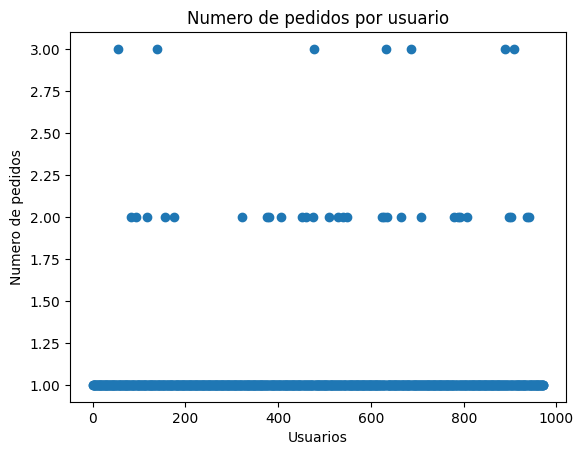

In [32]:
# Se traza el grafico de dispersion
x_values = pd.Series(range(len(ordersByUsers['transactions'])))

plt.scatter(x_values, ordersByUsers['transactions'])

plt.xlabel('Usuarios')
plt.ylabel('Numero de pedidos')
plt.title('Numero de pedidos por usuario')
plt.show()

Observamos que la gran mayoria de usuarios realiza un solo pedido. Otra parte, realiza dos pedidos. Solo unos cuantos pocos (7 usuarios) realizan 3 pedidos.

Estos usuarios anomalos que realizan 3 pedidos pueden ser excluidos del analisis.

# Percentiles de numero de pedidos por usuario

In [33]:
# Calculamos los percentiles para el numero de pedidos por usuario
np.percentile(ordersByUsers['transactions'], [90, 95, 99])

array([1., 1., 2.])

El calculo de percentiles corrobora lo observado en el grafico: solo el 1% de los usuarios hace mas de dos pedidos. Estos usuarios son anomalos y seran descartados del analisis.

# Precio de los pedidos

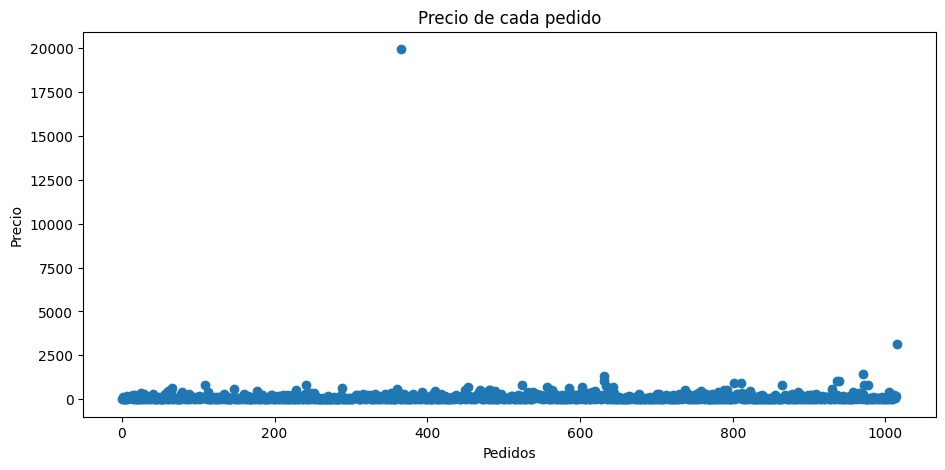

In [34]:
# Se traza el grafico de dispersion de los precios de los pedidos
x_values = pd.Series(range(len(orders_no_duplicates['revenue'])))

plt.figure(figsize=(11, 5))
plt.scatter(x_values, orders_no_duplicates['revenue'])

plt.xlabel('Pedidos')
plt.ylabel('Precio')
plt.title('Precio de cada pedido')
plt.show()

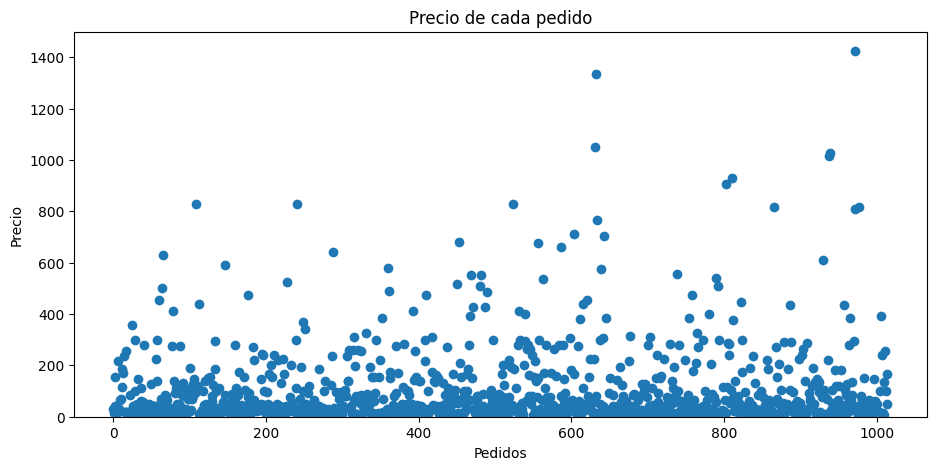

In [35]:
# Hacemos zoom
plt.figure(figsize=(11, 5))
plt.scatter(x_values, orders_no_duplicates['revenue'])

plt.xlabel('Pedidos')
plt.ylabel('Precio')
plt.ylim([0, 1500])
plt.title('Precio de cada pedido')
plt.show()

En el primer gráfico, podemos identificar una anomalía significativa: un solo pedido de 20,000. Este pedido podría estar detrás del aumento repentino en las gráficas de ingreso acumulado y tamaño promedio del pedido para el grupo B. Además, hay otro dato atípico, aunque menos impactante, con un precio cercano a los 3,000. Este también podría generar cambios no deseados, pero no tiene la misma relevancia que el primero.

En el segundo gráfico, vemos que los precios de los pedidos están bastante dispersos. Aunque la mayoría de los pedidos son inferiores a 200, no está claro en el gráfico dónde se debe marcar el límite para identificar pedidos con precios extremadamente altos o anómalos. Por lo tanto, es necesario realizar un análisis utilizando percentiles para obtener una mejor visión de estos valores atípicos.

# Percentiles de los precios de los pedidos

In [36]:
# Calculamos los percentiles
np.percentile(orders_no_duplicates['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

<div class="alert alert-block alert-success">
<b>Celda [36]</b> <a class="tocSkip"></a><br>
Buen uso de percentiles para identificar valores atípicos en los precios de pedidos. Esto aporta una base cuantitativa para las decisiones de filtrado, y tu justificación de excluir el 5% superior está bien argumentada y sustentada en los datos.
</div>


Notamos que solo el 10% de los pedidos supera los 280, lo que coincide con lo que se ve en la gráfica, donde la mayoría de los pedidos son menores a 200. Apenas el 5% de los pedidos supera los 414, y solo el 1% supera los 830. Con esta información, podemos decidir si excluir el 5% o el 1% de los pedidos más altos.

Al observar el gráfico con más detalle, vemos que los pedidos por encima de 400 están bastante dispersos, mientras que los pedidos menores a 400 están más agrupados y son más representativos de los datos en general. Por lo tanto, decidimos excluir el 5% superior de los pedidos para nuestro análisis.

# Diferencias en Conversion - Datos en Bruto

In [37]:
# Se calculan los pedidos de cada usuario del grupo A
ordersByUsersA = (orders_no_duplicates[orders_no_duplicates['group'] == 'A']
                 .groupby('visitorId', as_index=False)
                 .agg({
                     'transactionId': 'nunique'
                 }))
ordersByUsersA.columns = ['visitorId', 'transactions']
ordersByUsersA.head()

,visitorId,transactions
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [38]:
# Se calculan los pedidos de cada usuario del grupo B
ordersByUsersB = (orders_no_duplicates[orders_no_duplicates['group'] == 'B']
                 .groupby('visitorId', as_index=False)
                 .agg({
                     'transactionId': 'nunique'
                 }))
ordersByUsersB.columns = ['visitorId', 'transactions']
ordersByUsersB.head()

,visitorId,transactions
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [39]:
# Se prepara la muestra del grupo A
zerosA = pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() -
    len(ordersByUsersA['transactions'])))

sampleA = pd.concat([
    ordersByUsersA['transactions'], zerosA
])
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Length: 18736, dtype: int64

In [40]:
# Se prepara la muestra del grupo B
zerosB = pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() -
    len(ordersByUsersB['transactions'])))

sampleB = pd.concat([
    ordersByUsersB['transactions'], zerosB
])
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Length: 18916, dtype: int64

In [41]:
# Se realiza el Mann Whitney U Test
resultsConversion = st.mannwhitneyu(sampleA, sampleB)

print('p-value: {0:.3f}'.format(resultsConversion[1]))
print('Conversion (A): {0:.3f}'
      .format(sampleA.mean()))
print('Conversion (B): {0:.3f}'
      .format(sampleB.mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          sampleB.mean() / 
          sampleA.mean() - 1))

p-value: 0.011
Conversion (A): 0.025
Conversion (B): 0.029
Diferencia relativa: 0.160


<div class="alert alert-block alert-success">
<b>Celdas [30, 41]</b> <a class="tocSkip"></a><br>
Muy bien planteadas las conclusiones de la conversión. Aplicaste correctamente el test de Mann-Whitney para evaluar diferencias en los datos brutos y filtrados, y presentas los resultados de forma clara, incluyendo interpretación del p-valor y diferencia relativa. Excelente trabajo conectando estadísticas con decisiones prácticas.
</div>


Con los datos sin filtrar, la significancia estadística de la prueba es del 1.1%. Esto sugiere que tenemos razones suficientes para considerar que la diferencia relativa del 16% en la conversión entre los grupos es significativa y no es solo el resultado de una anomalía estadística, siempre y cuando el valor de alpha sea mayor al 1%. Si fijamos el alpha en 1%, tendríamos que rechazar la hipótesis de que existe una variación significativa entre las conversiones de ambos grupos.

Trabajar con los datos filtrados nos proporcionará un enfoque más preciso en estos resultados.

# Diferencias en tamaño promedio de pedido - Datos en Bruto

In [42]:
# Se realiza el Mann Whitney U Test para los tamaños de pedidos promedio
ordersA = orders_no_duplicates[orders_no_duplicates['group'] == 'A']
ordersB = orders_no_duplicates[orders_no_duplicates['group'] == 'B']

resultsAvgOrders = st.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])

print("p-value {0:.3f}"
      .format(resultsAvgOrders[1]))
print('Tamaño promedio de pedido (A): {0:.3f}'
      .format(ordersA['revenue'].mean()))
print('Tamaño promedio de pedido (B): {0:.3f}'
      .format(ordersB['revenue'].mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          ordersB['revenue'].mean() / 
          ordersA['revenue'].mean() - 1))

p-value 0.862
Tamaño promedio de pedido (A): 113.701
Tamaño promedio de pedido (B): 145.349
Diferencia relativa: 0.278


Vemos que el p-value es muy alto, lo que indicaria que las diferencias observadas en las graficas anteriores no es estadisticamente significativa y que los tamaños promedio de pedidos para ambos grupos son los mismos.

Recordar que estos resultados son obtenidos incluyendo los datos anomalos, al filtrarlos deberian existir menos diferencias.

# Diferencias en Conversion - Datos Filtrados

In [43]:
# Filtramos a los usuarios con compras costosas
usersExpensiveOrders = orders_no_duplicates[orders_no_duplicates['revenue'] > 414.275]['visitorId']
usersExpensiveOrders.head()

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitorId, dtype: int64

In [44]:
# Filtramos a los usuarios con muchas compras
usersManyOrders = ordersByUsers[ordersByUsers['transactions'] >= 2]['visitorId']
usersManyOrders.head()

55     249864742
82     366673373
94     406208401
118    522292794
138    611059232
Name: visitorId, dtype: int64

In [45]:
# Concatenamos las series
abnormalUsers = pd.concat([usersExpensiveOrders, usersManyOrders], axis=0).drop_duplicates()
abnormalUsers.head()

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitorId, dtype: int64

In [46]:
# Se filtran los usuarios anomalos y se prepara la muestra del grupo A
sampleAFiltered = pd.concat([
    ordersByUsersA[~ordersByUsersA['visitorId'].isin(abnormalUsers)]['transactions'],
    zerosA
])
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Length: 18697, dtype: int64

In [47]:
# Se filtran los usuarios anomalos y se prepara la muestra del grupo B
sampleBFiltered = pd.concat([
    ordersByUsersB[~ordersByUsersB['visitorId'].isin(abnormalUsers)]['transactions'],
    zerosB
])
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Length: 18869, dtype: int64

In [48]:
# Se realiza el Mann Whitney U Test
resultsConversionFiltered = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: {0:.3f}'.format(resultsConversionFiltered[1]))
print('Conversion (A): {0:.4f}'
      .format(sampleAFiltered.mean()))
print('Conversion (B): {0:.4f}'
      .format(sampleBFiltered.mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          sampleBFiltered.mean() / 
          sampleAFiltered.mean() - 1))

p-value: 0.016
Conversion (A): 0.0217
Conversion (B): 0.0255
Diferencia relativa: 0.174


El p-value ha aumentado en comparación con los datos sin filtrar. Sin embargo, este valor de 1.6% sigue siendo menor que el umbral estándar de alpha del 5%. Además, la diferencia relativa entre los grupos ha subido de un 16% a un 17%. Esto refuerza la idea de que la diferencia observada entre las conversiones de ambos grupos es estadísticamente significativa.

Es importante señalar que, si se estuvieran realizando múltiples pruebas al mismo tiempo, el umbral de significancia para esta etapa debería ser más bajo, lo que podría hacer que este p-value de 1.6% sea demasiado alto, y en ese caso, se podría atribuir la diferencia observada a una anomalía estadística.

# Diferencias en tamaño promedio de pedido - Datos Filtrados

In [49]:
# Se filtran los datos y se realiza el Mann Whitney U Test para los tamaños de pedidos promedio
ordersAFiltered = ordersA[~ordersA['visitorId'].isin(abnormalUsers)]
ordersBFiltered = ordersB[~ordersB['visitorId'].isin(abnormalUsers)]

resultsAvgOrdersFiltered = st.mannwhitneyu(ordersAFiltered['revenue'], ordersBFiltered['revenue'])

print("p-value: {0:.3f}"
      .format(resultsAvgOrdersFiltered[1]))
print('Tamaño promedio de pedido (A): {0:.3f}'
      .format(ordersAFiltered['revenue'].mean()))
print('Tamaño promedio de pedido (B): {0:.3f}'
      .format(ordersBFiltered['revenue'].mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          ordersBFiltered['revenue'].mean() / 
          ordersAFiltered['revenue'].mean() - 1))

p-value: 0.771
Tamaño promedio de pedido (A): 80.747
Tamaño promedio de pedido (B): 78.058
Diferencia relativa: -0.033


<div class="alert alert-block alert-success">
<b>Celda [49]</b> <a class="tocSkip"></a><br>
Aunque el análisis filtrado del tamaño promedio de pedido está bien ejecutado, convendría que menciones explícitamente si comprobaste la normalidad o simetría de las distribuciones antes de aplicar Mann-Whitney. Aunque es robusto, clarificar esto refuerza tu razonamiento estadístico.
</div>


Notamos que el p-value se reduce, lo cual podría parecer sorprendente al principio. Las medias de ambos grupos están más cercanas ahora, lo que nos haría pensar que el p-value debería aumentar. Sin embargo, al eliminar a los usuarios con pedidos extremadamente costosos, la varianza disminuye considerablemente. Esta reducción en la dispersión de los datos lleva a que el p-value sea más bajo que en el caso sin filtrar.

A pesar de esto, el p-value sigue siendo mucho mayor al 5%, por lo que concluimos que no existe una variación significativa en los tamaños promedio de los pedidos entre ambos grupos.

# Toma de Decisiones

Después de analizar cuidadosamente los datos, consideramos que la decisión debe basarse principalmente en lo que se espera obtener de ella. Presentamos dos escenarios:

### Aumentar la conversión:
Como herramienta para aumentar la conversión, la prueba se considera exitosa. El grupo B muestra una tasa de conversión promedio significativamente más alta que el grupo A.

### Aumentar los ingresos:
No creemos que se hayan generado mayores ingresos en comparación con el grupo de control. Los usuarios atípicos distorsionan los datos, haciendo que el grupo B parezca generar mayores ingresos, pero en realidad no es así. Después de filtrar los datos, no parece que este escenario vaya a cambiar. Consideramos que no hay diferencia significativa entre los grupos.

En ambos escenarios, recomendamos detener la prueba. Aunque el objetivo principal inicial era aumentar los ingresos, lo cual no se logró, sugerimos replantear el aumento de la conversión como un objetivo secundario, el cual sí se cumplió.

El hecho de que no hayamos alcanzado el objetivo inicial no significa necesariamente que la prueba no haya sido útil. Aunque no se lograron los resultados esperados, todo progreso es valioso.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Elías! Este proyecto destaca por su claridad estructural, rigor estadístico y excelente interpretación de resultados. Has utilizado adecuadamente los frameworks de priorización, las pruebas A/B y los análisis de conversión e ingresos, integrando todo en una narrativa lógica y bien fundamentada.  
    
Sigue así: estás demostrando un nivel avanzado en análisis de datos y toma de decisiones basadas en evidencia.
    
</div>
